In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from astropy.table import Table, join
import astropy.units as au
import astropy.constants as ac 

plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in" 

# mpl.rc('text.latex', preamble=r'\usepackage{cmbright} \boldmath')
# mpl.rcParams['text.latex.preamble'] = [r'\boldmath']
# mpl.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
# mpl.rc('text', usetex=True)

cmap = mpl.cm.get_cmap('tab20')
cmap1 = cmap(np.arange(0,1,0.1))
cmap2 = cmap(np.arange(0.05,1,0.1))

In [2]:
"""Star formation relations"""

def get_starK98(Sigma_gas):
    '''Schmidt law from Kennicutt (1998)
    Sigma_mol = surface density of molecular + atomic gas (Msun/pc^2)
    Sigma_SFR = surface density of star formation rate (Msun/kpc^2/yr)'''
    A = 2.5e-4
    N = 1.4
    Sigma_SFR = A * (Sigma_gas**N)
    return Sigma_SFR

def get_starB08(Sigma_mol):
    '''Schmidt law from Bigiel+ (2008)
    Sigma_mol = surface density of molecular gas (Msun/pc^2)
    Sigma_SFR = surface density of star formation rate (Msun/kpc^2/yr)
    [Note that I have divided this by a factor of 10 rwt the Bigiel+ (2008), which is in units of Msun/10]'''
    A = 10**-3.1
    N = 1
    Sigma_SFR = A * (Sigma_mol**N)
    return Sigma_SFR

In [3]:
"""Geometry"""

def get_areaannulus(R, deltaR):
    """Surface area (A) of annulus with outer radius R and width deltaR"""
    A = np.pi*(R**2 - (R-deltaR)**2)
    return(A)

def get_arearectangle(L, H):
    """Surface area (A) of rectangle with length L and height H"""
    A = L*H
    return(A)

def get_surfacedensity(A, p, log=True):
    """Surface area of annulus with outer radius R and width deltaR
    log=True returns log10 units"""
    Sigma = p/A
    if log: 
        Sigma=np.log10(Sigma)
    return(Sigma)

In [4]:
"""CMZ properties"""

area_flat = get_arearectangle(200, 20)
area_ring = get_areaannulus(100, 10)

sfr_CMZ = 0.012
gas_CMZ = 1.8e7

Sigmagas_CMZring_L = get_surfacedensity(area_ring, gas_CMZ)
Sigmasfr_CMZring_L = get_surfacedensity(area_ring, sfr_CMZ)+6 

sfr_CMZ = 0.14
gas_CMZ = 5.3e7

Sigmagas_CMZring_H = get_surfacedensity(area_ring, gas_CMZ)
Sigmasfr_CMZring_H = get_surfacedensity(area_ring, sfr_CMZ)+6

sfr_CMZ = 0.09
gas_CMZ = 1.8e7

Sigmagas_CMZring = get_surfacedensity(area_ring, gas_CMZ)
Sigmasfr_CMZring = get_surfacedensity(area_ring, sfr_CMZ)+6

In [23]:
print('Area fraction ring/flat %0.2f \n' %(area_ring/area_flat))

print('Sigma GAS ring low log(): %0.2f' %(Sigmagas_CMZring_L))
print('Sigma SFR ring low log(): %0.2f \n' %(Sigmasfr_CMZring_L))

print('Sigma GAS ring low log(): %0.2f' %(Sigmagas_CMZring_H))
print('Sigma SFR ring low log(): %0.2f \n' %(Sigmasfr_CMZring_H))

print('Sigma GAS ring low log(): %0.2f' %(Sigmagas_CMZring))
print('Sigma SFR ring low log(): %0.2f \n' %(Sigmasfr_CMZring))

Area fraction ring/flat 1.49 

Sigma GAS ring low log(): 3.48
Sigma SFR ring low log(): 0.30 

Sigma GAS ring low log(): 3.95
Sigma SFR ring low log(): 1.37 

Sigma GAS ring low log(): 3.48
Sigma SFR ring low log(): 1.18 



In [26]:
5.3e8/0.012/1e9

44.166666666666664

In [6]:
"""literature properties"""

Sigmagas_K98_L = np.log10(0.05e2)
Sigmagas_K98_H = np.log10(0.20e2)
Sigmasfr_K98_L = np.log10(0.0024)
Sigmasfr_K98_H = np.log10(0.017)

Sigmagas_D10SB_L = np.log10(3.0e2)
Sigmagas_D10SB_H = np.log10(100e2)
Sigmasfr_D10SB_L = np.log10(3.9)
Sigmasfr_D10SB_H = np.log10(560)

Sigmagas_D10BzK_L = np.log10(2.0e2)
Sigmagas_D10BzK_H = np.log10(10e2)
Sigmasfr_D10BzK_L = np.log10(0.28)
Sigmasfr_D10BzK_H = np.log10(2.7)

# 10**Sigmasfr_CMZring, 10**Sigmagas_CMZring
# # table = Table.read('./../data_lada/galaxies_MJD.csv')
# # table['logLHCN'].unit = au.K * au.km/ au.s/ au.pc**2
# # table['logLIR'].unit = au.Lsun

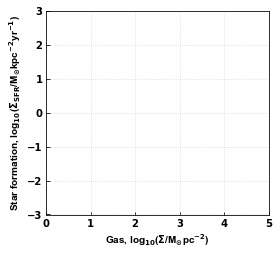

In [7]:
fig = plt.figure(figsize = (4, 3.75))
ax = fig.add_subplot(111)

xl = 'Gas, log$_{10}$($\Sigma$/M$_\mathrm{\odot}$pc$^{-2}$)'
yl = 'Star formation, log$_{10}$($\Sigma_\mathrm{SFR}$/M$_\mathrm{\odot}$kpc$^{-2}$yr$^{-1}$)'
ax.set_xlabel(xl, fontname="Arial", weight='heavy')
ax.set_ylabel(yl, fontname="Arial", weight='heavy')

ax.set_xlim(0, 5)
ax.set_ylim(-3, 3)

ax.grid(True, ls=':', zorder=-1, alpha=0.5)

In [8]:
"""Star formation relations"""
x = np.logspace(-15, 15, 31)
ax.plot(np.log10(x), np.log10(get_starK98(x)), linestyle='--', color = 'black', alpha=0.5, zorder=0, label='Kennicutt (1998)')
ax.plot(np.log10(x), np.log10(get_starB08(x)), linestyle='-.', color = 'black', alpha=0.5, zorder=0, label='Bigiel et al. (2008)')

legend1 = ax.legend(loc='lower right',ncol=1,
            scatterpoints=1, fontsize=8)
# fig

In [9]:
"""CMZ properties"""
ax.scatter(Sigmagas_CMZring_L, Sigmasfr_CMZring_L, fc=cmap2[0], ec=cmap1[0], lw=2, zorder=3)
ax.scatter(Sigmagas_CMZring_H, Sigmasfr_CMZring_H, fc=cmap2[0], ec=cmap1[0], lw=2, zorder=3)
ax.plot([Sigmagas_CMZring_L, Sigmagas_CMZring_H], [Sigmasfr_CMZring_L, Sigmasfr_CMZring_H], 
        c=cmap1[0], lw=2, ls='-', zorder=2)

# fig

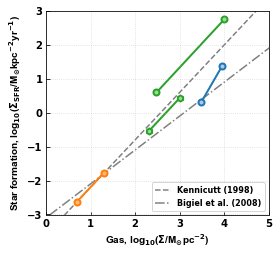

In [10]:
"""Literatur properties"""
m1 = ax.scatter(Sigmagas_K98_L, Sigmasfr_K98_L, fc=cmap2[1], ec=cmap1[1], lw=2, zorder=1)
ax.scatter(Sigmagas_K98_H, Sigmasfr_K98_H, fc=cmap2[1], ec=cmap1[1], lw=2, zorder=1)
ax.plot([Sigmagas_K98_L, Sigmagas_K98_H], [Sigmasfr_K98_L, Sigmasfr_K98_H], 
        c=cmap1[1], lw=2, ls='-', zorder=0)

m2 = ax.scatter(Sigmagas_D10SB_L, Sigmasfr_D10SB_L, fc=cmap2[2], ec=cmap1[2], lw=2, zorder=1)
ax.scatter(Sigmagas_D10SB_H, Sigmasfr_D10SB_H, fc=cmap2[2], ec=cmap1[2], lw=2, zorder=1)
ax.plot([Sigmagas_D10SB_L, Sigmagas_D10SB_H], [Sigmasfr_D10SB_L, Sigmasfr_D10SB_H], 
        c=cmap1[2], lw=2, ls='-', zorder=0)

m3 = ax.scatter(Sigmagas_D10BzK_L, Sigmasfr_D10BzK_L, fc=cmap2[2], ec=cmap1[2], lw=2, zorder=1, marker='h')
ax.scatter(Sigmagas_D10BzK_H, Sigmasfr_D10BzK_H, fc=cmap2[2], ec=cmap1[2], lw=2, zorder=1, marker='h')
ax.plot([Sigmagas_D10BzK_L, Sigmagas_D10BzK_H], [Sigmasfr_D10BzK_L, Sigmasfr_D10BzK_H], 
        c=cmap1[2], lw=2, ls='-', zorder=0)

fig

In [11]:
legend2 = ax.legend((m1,m2,m3), 
                   ('Kennicutt (1998)','Daddi et al. (2010)','Daddi et al. (2010)'),
                   loc='upper left', fontsize=8)
ax.add_artist(legend1)

In [12]:
plt.tight_layout()
fig.savefig('./../figs/plot_SK.pdf',bbox_inches='tight')

<Figure size 432x288 with 0 Axes>